# 1. Sample Data and Sampling Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import make_moons

data, label = make_moons(n_samples=300, shuffle=True, noise=0.5, random_state=2021)

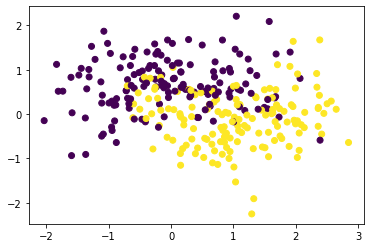

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=label)

### 1.2 Resample Data

In [4]:
from imblearn.datasets import make_imbalance
from collections import Counter


def ratio_func(y, multiplier, minority_class):
    target_stats = Counter(y)
    return {minority_class: int(multiplier * target_stats[minority_class])}

data, label = make_imbalance(
    data,
    label,
    sampling_strategy=ratio_func,
    **{"multiplier": 0.1, "minority_class": 1,}
)

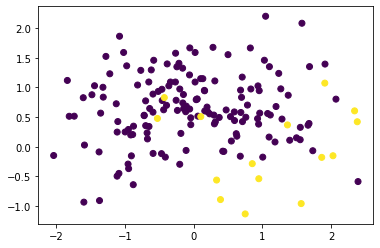

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=label)

In [6]:
pd.Series(label).value_counts()

0    150
1     15
dtype: int64

### 1.3 Split

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021, stratify=label)

In [8]:
train_label.mean()

0.08695652173913043

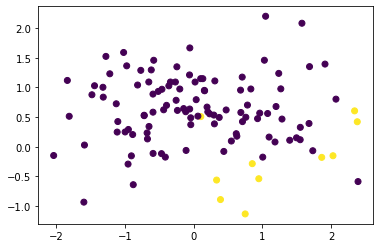

In [9]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label)

In [10]:
test_label.mean()

0.1

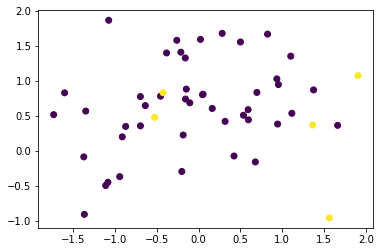

In [11]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label)

### 1.4 Visualization Data

In [12]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 2. Model

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

### 2.1 Learning & Predict

In [14]:
tree.fit(train_data, train_label)

DecisionTreeClassifier()

In [15]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.2 Evalution

In [16]:
# Accuracy
from sklearn.metrics import accuracy_score

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)

In [17]:
print(f"Tree train accuray is {tree_train_acc:.4f}")
print(f"Tree test accuray is {tree_test_acc:.4f}")   

Tree train accuray is 1.0000
Tree test accuray is 0.8800


In [18]:
# F1-Score
from sklearn.metrics import f1_score

tree_train_f1 = f1_score(train_label, tree_train_pred)
tree_test_f1 = f1_score(test_label, tree_test_pred)

In [19]:
print(f"Tree train F1-Score is {tree_train_f1:.4f}")
print(f"Tree test F1-Score is {tree_test_f1:.4f}")   

Tree train F1-Score is 1.0000
Tree test F1-Score is 0.2500


### 2.3 Visualization

In [20]:
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

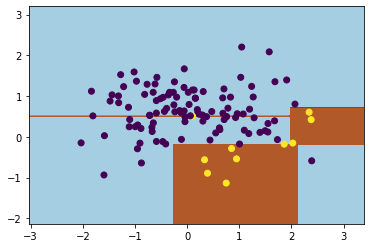

In [21]:
# Train
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

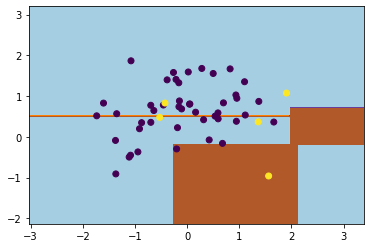

In [22]:
# Test
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

# 3. Under Sampling

### 3.1 Under sampling Data

In [23]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

under_dict = {}

rus = RandomUnderSampler(random_state=2021)
rus_data, rus_label = rus.fit_resample(train_data, train_label)
under_dict["rus"] = {"data": rus_data, "label": rus_label}

In [24]:
for i in range(1, 4):
    near_miss = NearMiss(version=i)
    near_data, near_label = near_miss.fit_resample(train_data, train_label)
    under_dict[f"near_{i}"] = {
        "data": near_data, "label": near_label
    }

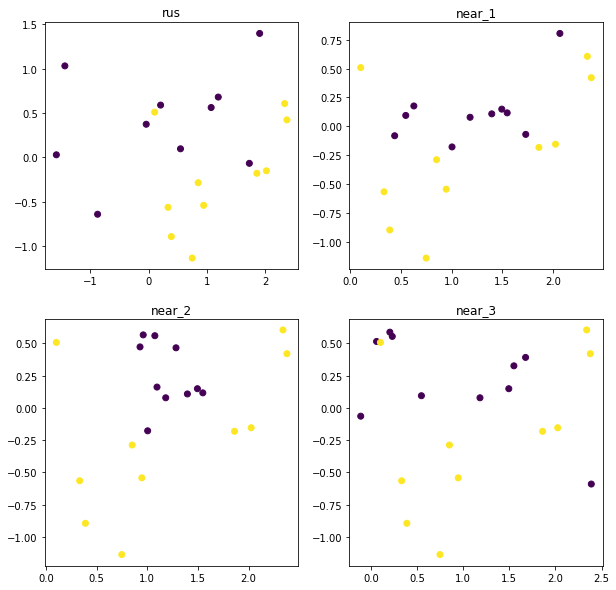

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for idx, (name, sample) in enumerate(under_dict.items()):
    ax = axes[idx//2, idx%2]
    d, l = sample["data"], sample["label"]
    ax.scatter(d[:, 0], d[:, 1], c=l)
    ax.set_title(name)

### 3.2 Learning

In [26]:
under_model = {}
for name, sample in under_dict.items():
    under_tree = DecisionTreeClassifier()
    under_tree.fit(sample["data"], sample["label"])
    under_model[name] = under_tree
    
under_model    

{'rus': DecisionTreeClassifier(),
 'near_1': DecisionTreeClassifier(),
 'near_2': DecisionTreeClassifier(),
 'near_3': DecisionTreeClassifier()}

### 3.3 Predict

In [27]:
under_pred = {}
for name, under_tree in under_model.items():
    under_test_pred = under_tree.predict(test_data)
    under_pred[name] = under_test_pred
    
under_pred    

{'rus': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0], dtype=int64),
 'near_1': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1], dtype=int64),
 'near_2': array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1], dtype=int64),
 'near_3': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1], dtype=int64)}

### 3.4 Evalution

In [28]:
# Accuracy
for name, pred in under_pred.items():
    acc = accuracy_score(test_label, pred)
    print(f"{name} Sampling test accuray is {acc:.4f}")

rus Sampling test accuray is 0.8400
near_1 Sampling test accuray is 0.1800
near_2 Sampling test accuray is 0.3400
near_3 Sampling test accuray is 0.8000


In [29]:
# F1-Score
for name, pred in under_pred.items():
    f1 = f1_score(test_label, pred)
    print(f"{name} Sampling test F1-Score is {f1:.4f}")

rus Sampling test F1-Score is 0.2000
near_1 Sampling test F1-Score is 0.1633
near_2 Sampling test F1-Score is 0.1951
near_3 Sampling test F1-Score is 0.1667


### 3.5 Visualization

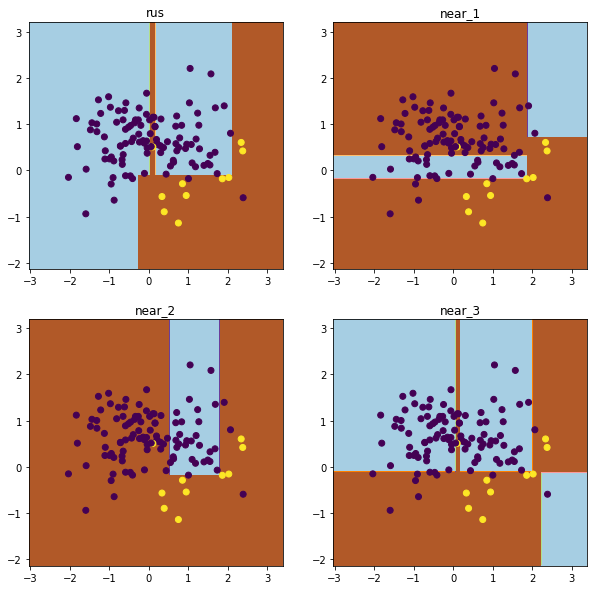

In [30]:
# Train Data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for idx, (name, under_tree) in enumerate(under_model.items()):
    ax = axes[idx//2, idx%2]
    
    under_Z = under_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    under_Z = under_Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, under_Z, cmap=plt.cm.Paired)
    ax.scatter(train_data[:,0], train_data[:,1], c=train_label)
    
    ax.set_title(name)

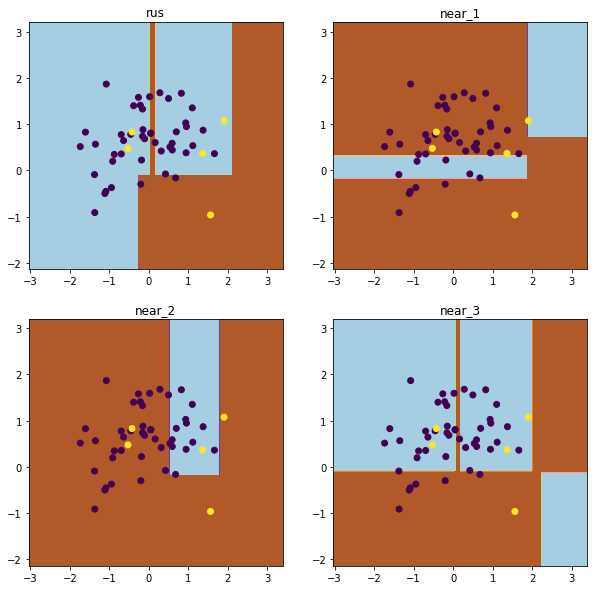

In [31]:
# Test Data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for idx, (name, under_tree) in enumerate(under_model.items()):
    ax = axes[idx//2, idx%2]
    
    under_Z = under_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    under_Z = under_Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, under_Z, cmap=plt.cm.Paired)
    ax.scatter(test_data[:,0], test_data[:,1], c=test_label)
    
    ax.set_title(name)

# 4. Over Sampling

### 4.1 Over Sampling Data

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2021)

In [33]:
smote_data, smote_label = smote.fit_resample(train_data, train_label)

smote_data[:10]

array([[ 1.0963906 ,  0.16215513],
       [ 0.43879078, -0.0803489 ],
       [ 0.20618849,  0.58791678],
       [-0.59047253,  0.58307246],
       [ 1.73131008, -0.06861231],
       [ 0.10237896,  1.1495802 ],
       [ 0.23230422,  0.55483897],
       [-1.1107737 ,  0.24678492],
       [ 0.94696029, -0.54173336],
       [-0.87710056, -0.64256821]])

In [34]:
smote_label[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

Text(0.5, 1.0, 'smote data')

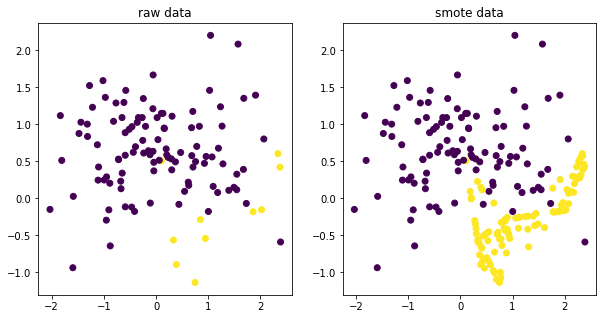

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_data[:, 0], train_data[:, 1], c=train_label)
axes[0].set_title("raw data")

axes[1].scatter(smote_data[:,0], smote_data[:,1], c=smote_label)
axes[1].set_title("smote data")

### 4.2 Learning & Predict

In [36]:
smote_tree = DecisionTreeClassifier()
smote_tree.fit(smote_data, smote_label)

DecisionTreeClassifier()

In [37]:
smote_test_pred = smote_tree.predict(test_data)

### 4.3 Evalution

In [38]:
# Accuracy
smote_acc = accuracy_score(test_label, smote_test_pred)
print(f"SMOTE test accuray is {smote_acc:.4f}")

SMOTE test accuray is 0.9000


In [39]:
# F1-Score
smote_f1 = f1_score(test_label, smote_test_pred)
print(f"SMOTE test F1-Score is {smote_f1:.4f}")

SMOTE test F1-Score is 0.2857


In [40]:
### 4.4 Visualization
smote_Z = smote_tree.predict(np.c_[xx.ravel(), yy.ravel()])
smote_Z = smote_Z.reshape(xx.shape)

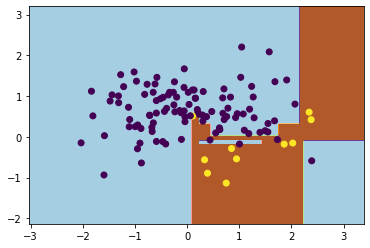

In [41]:
# Train
cs = plt.contourf(xx, yy, smote_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)

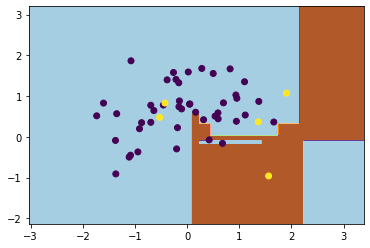

In [42]:
# Test
cs = plt.contourf(xx, yy, smote_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)

# 5. Total

### 5.1 Accuracy

In [43]:
print(f"Tree test accuray is {tree_test_acc:.4f}")   

for name, pred in under_pred.items():
    acc = accuracy_score(test_label, pred)
    print(f"{name} Sampling test accuray is {acc:.4f}")
    
print(f"SMOTE test accuray is {smote_acc:.4f}")

Tree test accuray is 0.8800
rus Sampling test accuray is 0.8400
near_1 Sampling test accuray is 0.1800
near_2 Sampling test accuray is 0.3400
near_3 Sampling test accuray is 0.8000
SMOTE test accuray is 0.9000


### 5.2 F1-Score

In [44]:
print(f"Tree test F1-Score is {tree_test_f1:.4f}")   

for name, pred in under_pred.items():
    f1 = f1_score(test_label, pred)
    print(f"{name} Sampling test F1-Score is {f1:.4f}")
    
print(f"SMOTE test F1-Score is {smote_f1:.4f}")

Tree test F1-Score is 0.2500
rus Sampling test F1-Score is 0.2000
near_1 Sampling test F1-Score is 0.1633
near_2 Sampling test F1-Score is 0.1951
near_3 Sampling test F1-Score is 0.1667
SMOTE test F1-Score is 0.2857


# 6. Summary
> 이상탐지(Anomaly Detection) 정의
- 주어진 데이터의 정상 여부 판별 문제
- 신용카드 사기, 대출 사기 탐지 등이 대표적인 예

>> 이상탐지 특징
- 이상탐지 문제의 가장 큰 특징은 정상 데이터와 이상 데이터의 비율 불균형

> 데이터 불균형(Class Imbalance) 정의
- 지도 학습에서 모델 학습하기 위해선 정답 데이터가 필요
- 예를 들어 Binary Classfication 문제에서 한 쪽의 데이터가 매우 적은 상황

>> 데이터 불균형의 문제
- 모델이 모든 예측 값을 데이터가 많은 쪽으로 예측하는 상황 발생
- Decision Tree 경우 모든 데이터는 Majority Group으로 예측하면 더 많은 정보 이득 얻을 수 있음  

>> 데이터 불균형의 해결 방법 
- 샘플링을 통한 해결방법
    1. Under Sampling : Majority Group의 데이터를 덜 뽑아 데이터 비율 맞추는 방법
        - Random Under Sampling : Majority Group의 데이터를 무작위로 삭제하는 방법
            - 장점 : 빠르고 쉽다
            - 단점 : Majority Group의 정보를 잃을 수 있음
        - Near Miss Under Sampling : Minority Group 근처에 있는 Majority Group의 데이터 선택 방법
            - Near-Miss ver.1 : 가장 가까운 3개의 Minority Group의 데이터 평균 거리
            - Near-Miss ver.2 : 가장 먼 3개의 Minority Group의 데이터 평균 거리
            - Near-Miss ver.3 : 가장 가까운 Minority Group의 데이터 평균 거리
    2. Over Sampling : Minorty Group의 데이터를 더 뽑아 데이터 비율 맞추는 방법
        - Simple Over Sampling : Minority Group에서 데이터를 더 많이 추출 하는 방법
            - 장점 : 빠르게 적용 가능
            - 단점 : 데이터의 새로운 정보 제공하지 않고 과대 적합될 가능성이 큼
        - SMOTE (synthetic minority oversampling technique) : 합성 데이터를 생성해서 데이터 비율 맞추는 
            - SMOTE 방법
                1. Minority Group에서 임의의 데이터 선택
                2. KNN에서 선택된 데이터와 Minority Group 중 가까운 이웃을 찾는다
                3. 선택된 데이터와 가가운 이웃 사이의 거리 측정
                4. 0~1 사이의 임의의 수를 곱하여 데이터 생성
                5. 데이터 비율이 같아질 때 까지 A~D 반복
            - 장점 : 정보가 손실되지 않는다
            - 단점 : 새로운 데이터를 잘 예측하지 못함
- 모델을 통한 해결방법
    - Out-of-Distribution : 모델은 정상 범위 데이터(In-Distribution)만 학습하며, 정상 범위에서 먼 데이터(Out-of-Distribution)을 이상 판단하는 이상탐지모델
        - Isolation Forest
            - Regression Decision Tree 기반 Random Forest
            - 정상 데이터는 더 많은 분할하고, 비정상 데이터는 분할을 덜 한다는 개념
        - OCSVM(One-Class SVM)
            - 데이터를 Mapping한 뒤 정상 데이터를 원점에서 멀어지게 하는 방법
            - Feature Space에서 원점기준 가까운 데이터는 비정상 데이터, 먼 데이터는 정상 데이터
        - PCA
            - 차원 축소를 이용하는 방법
            - 차원 축소 전 원래 데이터의 위치와 비교하여 거리가 먼 데이터를 비정상으로 판단

> Anomaly Detection과 Accuracy
- 정답을 Majority Group으로만 예측할 경우 Accuracy는 상승
- Minority Group을 잘 예측하는지 알 수 없다는 단점이 있음

>> Accuracy 계산 방법
- Accuracy = (True Positive + True Nagetive) / All Data
- 이상 탐지에서는 주로 정상을 False, 이상은 True로 설정

>> F1-Score
- 정확도는 잘못 분류된 데이터를 반영하지 않는 문제가 있음
- F1 Score는 Precision과 Recall의 조화 평균으로 계싼
- 잘못 분류된 데이터를 반영한 평가지표
    - Precision : True Positive / (True Positive + False Poistive)
    - Recall : True Positive / (True Positive + False Nagetive)
    - F1-Score : 2 * (Precision * Recall) / (Precision + Recall)